# Multimodal Machine Learning - Coding Assignment 2

Antonio Villarreal

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import zipfile

# specify the zip file name
zip_file = '/content/gdrive/MyDrive/coding_assignment_2.zip'

# specify the directory where you want to extract the files
extraction_path = '/content/'

# extract the files
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [3]:
TEST = '/content/coding_assignment_2/test.csv'
TRAIN = '/content/coding_assignment_2/train.csv'

## 1) Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file into a pandas dataframe
test_df = pd.read_csv(TEST)
train_df = pd.read_csv(TRAIN)

Snapshot of CSV Files

In [ ]:
test_df.head()

,Index,Sentiment,Text
0,0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,1,Reading my kindle2... Love it... Lee childs i...
2,2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary You'll love your Kindle2. I've had...
4,4,1,@mikefish Fair enough. But i have the Kindle2...


In [ ]:
train_df.head()

,Index,Sentiment,Text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,is upset that he can't update his Facebook by ...
2,2,0,@Kenichan I dived many times for the ball. Man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."


Checking for any missing values and removing them from Test CSV

In [ ]:
# Check for missing values
print(test_df.isnull().sum())

# Remove rows with missing values
test_df.dropna(inplace=True)

# Remove duplicates
test_df.drop_duplicates(inplace=True)

# Reset the index
test_df.reset_index(drop=True, inplace=True)

Index        0
Sentiment    0
Text         0
dtype: int64


Checking for any missing values and removing them from Train CSV

In [ ]:
# Check for missing values
print(train_df.isnull().sum())

# Remove rows with missing values
train_df.dropna(inplace=True)

# Remove duplicates
train_df.drop_duplicates(inplace=True)

# Reset the index
train_df.reset_index(drop=True, inplace=True)

Index        0
Sentiment    0
Text         0
dtype: int64


In [ ]:
# Read the CSV file into a pandas dataframe
test_df = pd.read_csv(TEST)
train_df = pd.read_csv(TRAIN)

Counting the number of tuples of data

In [ ]:
# Get the number of rows in the dataframe
test_rows = test_df.shape[0]
train_rows = train_df.shape[0]

print(f"Number of tuples of Testing data: ", test_rows)
print(f"Number of tuples of Training data: ", train_rows)

Number of tuples of Testing data:  359
Number of tuples of Training data:  1048575


Checking the sentiment distribution

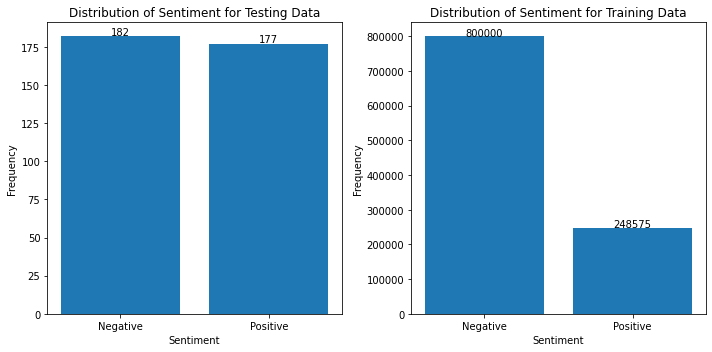

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the distribution of sentiment for the test data
sentiment_counts = test_df['Sentiment'].value_counts()
axs[0].bar(['Negative', 'Positive'], sentiment_counts)
axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Sentiment for Testing Data')
for i, v in enumerate(sentiment_counts):
    axs[0].text(i, v + 1, str(v), ha='center')

# Plot the distribution of sentiment for the training data
sentiment_counts = train_df['Sentiment'].value_counts()
axs[1].bar(['Negative', 'Positive'], sentiment_counts)
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Sentiment for Training Data')
for i, v in enumerate(sentiment_counts):
    axs[1].text(i, v + 1, str(v), ha='center')

# Adjust the layout of the plots
fig.tight_layout()

# Show the plots
plt.show()

Confirming that there are no missing values

In [ ]:
# Check for missing values in the "Sentiment" column
sentiment_missing = test_df['Sentiment'].isna().sum()

# Check for missing values in the "Text" column
text_missing = test_df['Text'].isna().sum()

# Print the number of missing values in each column
print(f"Missing values in Sentiment column for Testing Data: {sentiment_missing}")
print(f"Missing values in Text column for Testing Data: {text_missing}")

# Check for missing values in the "Sentiment" column
sentiment_missing = train_df['Sentiment'].isna().sum()

# Check for missing values in the "Text" column
text_missing = train_df['Text'].isna().sum()

# Print the number of missing values in each column
print(f"Missing values in Sentiment column for Training Data: {sentiment_missing}")
print(f"Missing values in Text column for Training Data: {text_missing}")

Missing values in Sentiment column for Testing Data: 0
Missing values in Text column for Testing Data: 0
Missing values in Sentiment column for Training Data: 0
Missing values in Text column for Training Data: 0


In [ ]:
test_df.to_csv('/content/coding_assignment_2/step1_test.csv', index=False, mode='w')
train_df.to_csv('/content/coding_assignment_2/step1_train.csv', index=False, mode='w')

In [ ]:
TEST = '/content/coding_assignment_2/step1_test.csv'
TRAIN = '/content/coding_assignment_2/step1_train.csv'

## 2) Text Preprocessing

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Read the testing data CSV file
test_data = pd.read_csv(TEST)
train_data = pd.read_csv(TRAIN)

3. Change Case

In [ ]:
test_df['Text'] = test_df['Text'].str.lower()
train_df['Text'] = train_df['Text'].str.lower()

In [ ]:
test_df.head()

,Index,Sentiment,Text
0,0,1,@stellargirl i loooooooovvvvvveee my kindle2. ...
1,1,1,reading my kindle2... love it... lee childs i...
2,2,1,"ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary you'll love your kindle2. i've had...
4,4,1,@mikefish fair enough. but i have the kindle2...


4. Remove Stop-Words

In [ ]:
stop_words = set(stopwords.words('english'))
test_df['Text'] = test_df['Text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
train_df['Text'] = train_df['Text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [ ]:
test_df.head()

,Index,Sentiment,Text
0,0,1,@stellargirl loooooooovvvvvveee kindle2. dx co...
1,1,1,reading kindle2... love it... lee childs good ...
2,2,1,"ok, first assesment #kindle2 ...it fucking roc..."
3,3,1,@kenburbary love kindle2. i've mine months nev...
4,4,1,@mikefish fair enough. kindle2 think perfect :)


5. Remove Special Characters

In [ ]:
test_data['Text'] = test_data['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
train_data['Text'] = train_data['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
test_df.head()

,Index,Sentiment,Text
0,0,1,@stellargirl loooooooovvvvvveee kindle2. dx co...
1,1,1,reading kindle2... love it... lee childs good ...
2,2,1,"ok, first assesment #kindle2 ...it fucking roc..."
3,3,1,@kenburbary love kindle2. i've mine months nev...
4,4,1,@mikefish fair enough. kindle2 think perfect :)


6. Remove Digital Numbers

In [ ]:
test_df['Text'] = test_df['Text'].str.replace('\d+', '')
train_df['Text'] = train_df['Text'].str.replace('\d+', '')

<ipython-input-24-4962e755c7c4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['Text'] = test_df['Text'].str.replace('\d+', '')
<ipython-input-24-4962e755c7c4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Text'] = train_df['Text'].str.replace('\d+', '')


In [ ]:
test_df.head()

,Index,Sentiment,Text
0,0,1,@stellargirl loooooooovvvvvveee kindle. dx coo...
1,1,1,reading kindle... love it... lee childs good r...
2,2,1,"ok, first assesment #kindle ...it fucking rock..."
3,3,1,@kenburbary love kindle. i've mine months neve...
4,4,1,@mikefish fair enough. kindle think perfect :)


7. Stemming

In [ ]:
# stemmer = SnowballStemmer('english')
# stop_words = set(stopwords.words('english'))
# test_df['Text'] = test_df['Text'].apply(lambda x: ' '.join(stemmer.stem(word) for word in word_tokenize(x) if word not in stop_words))

In [ ]:
# test_df.head()

8. Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
test_df['Text'] = test_df['Text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(x) if word not in stop_words))
train_df['Text'] = train_df['Text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(x) if word not in stop_words))

In [ ]:
test_df.head()

,Index,Sentiment,Text
0,0,1,@ stellargirl loooooooovvvvvveee kindle . dx c...
1,1,1,read kindle ... love ... lee childs good read .
2,2,1,"ok , first assesment # kindle ... fuck rock ! ! !"
3,3,1,@ kenburbary love kindle . 've mine months nev...
4,4,1,@ mikefish fair enough . kindle think perfect : )


Text Preprocessing Results

In [ ]:
# Print the first five rows of the preprocessed training data
print(train_data.head())

# Print the first five rows of the preprocessed testing data
print(test_data.head())

   Index  Sentiment                                               Text
0      0          0  switchfoot httptwitpiccom2y1zl  Awww thats a b...
1      1          0  is upset that he cant update his Facebook by t...
2      2          0  Kenichan I dived many times for the ball Manag...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  nationwideclass no its not behaving at all im ...
   Index  Sentiment                                               Text
0      0          1  stellargirl I loooooooovvvvvveee my Kindle2 No...
1      1          1  Reading my kindle2  Love it Lee childs is good...
2      2          1  Ok first assesment of the kindle2 it fucking r...
3      3          1  kenburbary Youll love your Kindle2 Ive had min...
4      4          1  mikefish  Fair enough But i have the Kindle2 a...


In [ ]:
test_df.to_csv('/content/coding_assignment_2/step2_test.csv', index=False, mode='w')
train_df.to_csv('/content/coding_assignment_2/step2_train.csv', index=False, mode='w')

In [ ]:
test_df.to_csv('/content/gdrive/MyDrive/coding_assignment_results/step2_test.csv', index=False, mode='w')
train_df.to_csv('/content/gdrive/MyDrive/coding_assignment_results/step2_train.csv', index=False, mode='w')

## 3) Linguistic Feature Extraction

In [ ]:
TEST = '/content/gdrive/MyDrive/coding_assignment_results/step2_test.csv'
TRAIN = '/content/gdrive/MyDrive/coding_assignment_results/step2_train.csv'

Bag of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load data
train_df = pd.read_csv(TRAIN)
test_df = pd.read_csv(TEST)

# Remove NaNs from text data
train_df['Text'].replace(np.nan, '', regex=True, inplace=True)
test_df['Text'].replace(np.nan, '', regex=True, inplace=True)

# Extract linguistic features from text data using Bag of Words approach
vectorizer = CountVectorizer()
X_train_BW = vectorizer.fit_transform(train_df['Text'])
X_test_BW = vectorizer.transform(test_df['Text'])

# Get labels
y_train_BW = train_df['Sentiment']
y_test_BW = test_df['Sentiment']

TF*IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
train_df = pd.read_csv(TRAIN)
test_df = pd.read_csv(TEST)

# Remove NaNs from text data
train_df['Text'].replace(np.nan, '', regex=True, inplace=True)
test_df['Text'].replace(np.nan, '', regex=True, inplace=True)

# Extract linguistic features from text data using TF-IDF approach
vectorizer = TfidfVectorizer()
X_train_TF = vectorizer.fit_transform(train_df['Text'])
X_test_TF = vectorizer.transform(test_df['Text'])

# Get labels
y_train_TF = train_df['Sentiment']
y_test_TF = test_df['Sentiment']

## 4) Build Sentiment Classification Model + Evaluation

### Bag of Words with Logistic Regression vs Naive Bayes

In [ ]:
X_train = X_train_BW
X_test = X_test_BW
y_train = y_train_BW
y_test = y_test_BW

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, precision_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
}

bag_of_words_results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    train_loss = clf.score(X_train, y_train)
    test_loss = clf.score(X_test, y_test)
    print(f"{name}")
    print(f"Training Accuracy: {acc_train}")
    print(f"Testing Accuracy: {acc_test}")
    print(f"Training F1-score: {f1_train}")
    print(f"Testing F1-score: {f1_test}")
    print(f"Training Precision: {precision_train}")
    print(f"Testing Precision: {precision_test}")
    print(f"Training Loss: {train_loss}")
    print(f"Testing Loss: {test_loss}")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))

    bag_of_words_results[name] = {
        'train_accuracy': acc_train,
        'test_accuracy': acc_test,
        'train_f1_score': f1_train,
        'test_f1_score': f1_test,
        'train_precision': precision_train,
        'test_precision': precision_test,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'confusion_matrix': confusion_matrix(y_test, y_pred_test),
        'classification_report': classification_report(y_test, y_pred_test)
    }

Logistic Regression
Training Accuracy: 0.8791512290489474
Testing Accuracy: 0.7437325905292479
Training F1-score: 0.7026206294485813
Testing F1-score: 0.6870748299319729
Training Precision: 0.8431712702203398
Testing Precision: 0.9017857142857143
Training Loss: 0.8791512290489474
Testing Loss: 0.7437325905292479
[[166  11]
 [ 81 101]]
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       177
           1       0.90      0.55      0.69       182

    accuracy                           0.74       359
   macro avg       0.79      0.75      0.74       359
weighted avg       0.79      0.74      0.73       359

Naive Bayes
Training Accuracy: 0.8663948692272847
Testing Accuracy: 0.7019498607242339
Training F1-score: 0.6625867346815896
Testing F1-score: 0.6219081272084807
Training Precision: 0.8255155196005474
Testing Precision: 0.8712871287128713
Training Loss: 0.8663948692272847
Testing Loss: 0.7019498607242339
[[164  13]
 [ 94  88]]
       

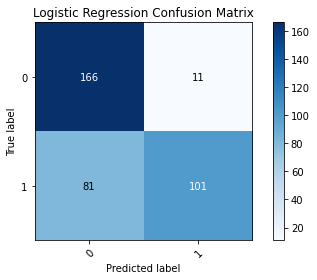

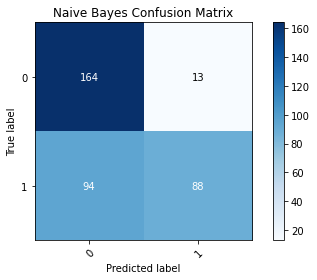

In [ ]:
import numpy as np

for name, results in bag_of_words_results.items():
    cm = results['confusion_matrix']
    classes = np.unique(y_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')
    plt.title(f'{name} Confusion Matrix')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

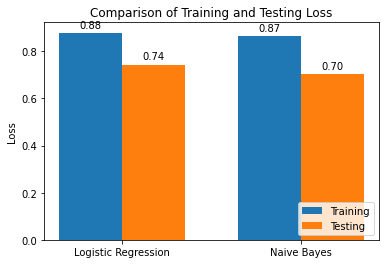

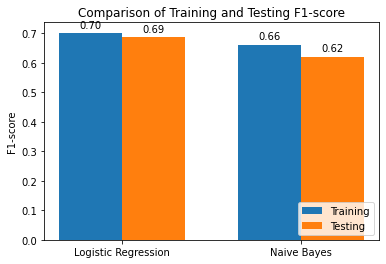

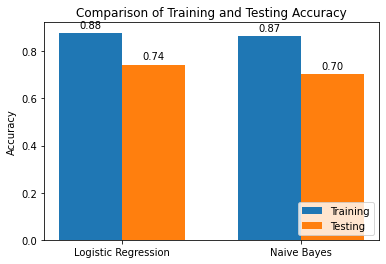

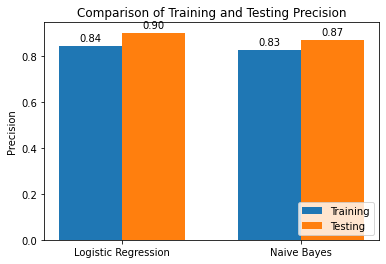

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# get data from bag_of_words_results dictionary
train_f1_LR = bag_of_words_results['Logistic Regression']['train_f1_score']
test_f1_LR = bag_of_words_results['Logistic Regression']['test_f1_score']
train_f1_NB = bag_of_words_results['Naive Bayes']['train_f1_score']
test_f1_NB = bag_of_words_results['Naive Bayes']['test_f1_score']

train_acc_LR = bag_of_words_results['Logistic Regression']['train_accuracy']
test_acc_LR = bag_of_words_results['Logistic Regression']['test_accuracy']
train_acc_NB = bag_of_words_results['Naive Bayes']['train_accuracy']
test_acc_NB = bag_of_words_results['Naive Bayes']['test_accuracy']

train_loss_LR = bag_of_words_results['Logistic Regression']['train_loss']
test_loss_LR = bag_of_words_results['Logistic Regression']['test_loss']
train_loss_NB = bag_of_words_results['Naive Bayes']['train_loss']
test_loss_NB = bag_of_words_results['Naive Bayes']['test_loss']

train_pre_LR = bag_of_words_results['Logistic Regression']['train_precision']
test_pre_LR = bag_of_words_results['Logistic Regression']['test_precision']
train_pre_NB = bag_of_words_results['Naive Bayes']['train_precision']
test_pre_NB = bag_of_words_results['Naive Bayes']['test_precision']

# create bar plots for Loss
labels = ['Logistic Regression', 'Naive Bayes']
train_losses = [train_loss_LR, train_loss_NB]
test_losses = [test_loss_LR, test_loss_NB]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_losses, width, label='Training')
rects2 = ax.bar(x + width/2, test_losses, width, label='Testing')

ax.set_ylabel('Loss')
ax.set_title('Comparison of Training and Testing Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


# create bar plots for F1-scores
labels = ['Logistic Regression', 'Naive Bayes']
train_f1 = [train_f1_LR, train_f1_NB]
test_f1 = [test_f1_LR, test_f1_NB]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_f1, width, label='Training')
rects2 = ax.bar(x + width/2, test_f1, width, label='Testing')

ax.set_ylabel('F1-score')
ax.set_title('Comparison of Training and Testing F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_acc = [train_acc_LR, train_acc_NB]
test_acc = [test_acc_LR, test_acc_NB]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_acc, width, label='Training')
rects2 = ax.bar(x + width/2, test_acc, width, label='Testing')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_pre = [train_pre_LR, train_pre_NB]
test_pre = [test_pre_LR, test_pre_NB]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_pre, width, label='Training')
rects2 = ax.bar(x + width/2, test_pre, width, label='Testing')

ax.set_ylabel('Precision')
ax.set_title('Comparison of Training and Testing Precision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

### TF*IDF with Logistic Regression vs Naive Bayes

In [ ]:
X_train = X_train_TF
X_test = X_test_TF
y_train = y_train_TF
y_test = y_test_TF

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
}

tf_results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    train_loss = clf.score(X_train, y_train)
    test_loss = clf.score(X_test, y_test)
    print(f"{name}")
    print(f"Training Accuracy: {acc_train}")
    print(f"Testing Accuracy: {acc_test}")
    print(f"Training F1-score: {f1_train}")
    print(f"Testing F1-score: {f1_test}")
    print(f"Training Precision: {precision_train}")
    print(f"Testing Precision: {precision_test}")
    print(f"Training Loss: {train_loss}")
    print(f"Testing Loss: {test_loss}")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))

    tf_results[name] = {
        'train_accuracy': acc_train,
        'test_accuracy': acc_test,
        'train_f1_score': f1_train,
        'test_f1_score': f1_test,
        'train_precision': precision_train,
        'test_precision': precision_test,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'confusion_matrix': confusion_matrix(y_test, y_pred_test),
        'classification_report': classification_report(y_test, y_pred_test)
    }


Logistic Regression
Training Accuracy: 0.8608511551391174
Testing Accuracy: 0.7576601671309192
Training F1-score: 0.650117500359695
Testing F1-score: 0.7030716723549488
Training Precision: 0.8047493247053934
Testing Precision: 0.9279279279279279
Training Loss: 0.8608511551391174
Testing Loss: 0.7576601671309192
[[169   8]
 [ 79 103]]
              precision    recall  f1-score   support

           0       0.68      0.95      0.80       177
           1       0.93      0.57      0.70       182

    accuracy                           0.76       359
   macro avg       0.80      0.76      0.75       359
weighted avg       0.81      0.76      0.75       359

Naive Bayes
Training Accuracy: 0.8116253010037432
Testing Accuracy: 0.5153203342618384
Training F1-score: 0.3460151705277238
Testing F1-score: 0.10309278350515463
Training Precision: 0.9774776460024692
Testing Precision: 0.8333333333333334
Training Loss: 0.8116253010037432
Testing Loss: 0.5153203342618384
[[175   2]
 [172  10]]
       

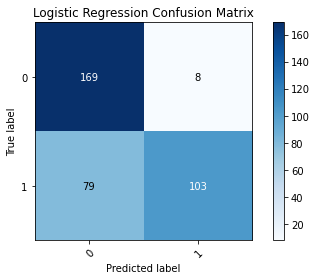

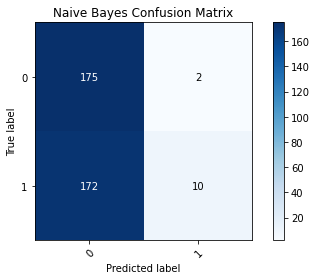

In [ ]:
import numpy as np

for name, results in tf_results.items():
    cm = results['confusion_matrix']
    classes = np.unique(y_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')
    plt.title(f'{name} Confusion Matrix')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()


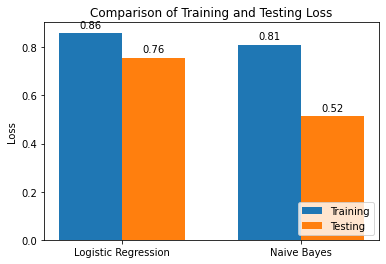

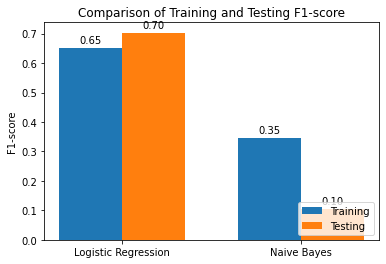

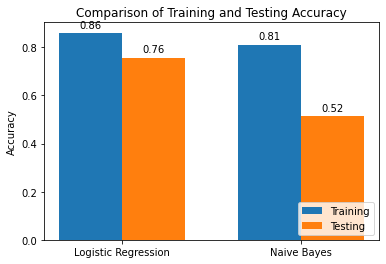

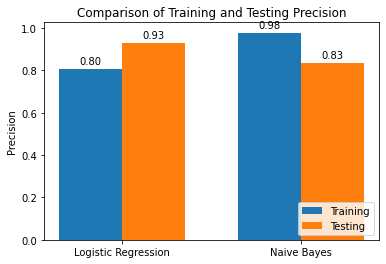

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# get data from tf_results dictionary
train_f1_LR = tf_results['Logistic Regression']['train_f1_score']
test_f1_LR = tf_results['Logistic Regression']['test_f1_score']
train_f1_NB = tf_results['Naive Bayes']['train_f1_score']
test_f1_NB = tf_results['Naive Bayes']['test_f1_score']

train_acc_LR = tf_results['Logistic Regression']['train_accuracy']
test_acc_LR = tf_results['Logistic Regression']['test_accuracy']
train_acc_NB = tf_results['Naive Bayes']['train_accuracy']
test_acc_NB = tf_results['Naive Bayes']['test_accuracy']

train_loss_LR = tf_results['Logistic Regression']['train_loss']
test_loss_LR = tf_results['Logistic Regression']['test_loss']
train_loss_NB = tf_results['Naive Bayes']['train_loss']
test_loss_NB = tf_results['Naive Bayes']['test_loss']

train_pre_LR = tf_results['Logistic Regression']['train_precision']
test_pre_LR = tf_results['Logistic Regression']['test_precision']
train_pre_NB = tf_results['Naive Bayes']['train_precision']
test_pre_NB = tf_results['Naive Bayes']['test_precision']

# create bar plots for Loss
labels = ['Logistic Regression', 'Naive Bayes']
train_losses = [train_loss_LR, train_loss_NB]
test_losses = [test_loss_LR, test_loss_NB]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_losses, width, label='Training')
rects2 = ax.bar(x + width/2, test_losses, width, label='Testing')

ax.set_ylabel('Loss')
ax.set_title('Comparison of Training and Testing Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


# create bar plots for F1-scores
labels = ['Logistic Regression', 'Naive Bayes']
train_f1 = [train_f1_LR, train_f1_NB]
test_f1 = [test_f1_LR, test_f1_NB]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_f1, width, label='Training')
rects2 = ax.bar(x + width/2, test_f1, width, label='Testing')

ax.set_ylabel('F1-score')
ax.set_title('Comparison of Training and Testing F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_acc = [train_acc_LR, train_acc_NB]
test_acc = [test_acc_LR, test_acc_NB]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_acc, width, label='Training')
rects2 = ax.bar(x + width/2, test_acc, width, label='Testing')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_pre = [train_pre_LR, train_pre_NB]
test_pre = [test_pre_LR, test_pre_NB]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_pre, width, label='Training')
rects2 = ax.bar(x + width/2, test_pre, width, label='Testing')

ax.set_ylabel('Precision')
ax.set_title('Comparison of Training and Testing Precision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [ ]:
X_train = X_train_WV
X_test = X_val_WV
y_train = y_train_WV
y_test = y_val_WV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Convert input data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Train and evaluate Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", acc_lr)

# Train and evaluate Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes accuracy:", acc_nb)

# Train and evaluate Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
acc_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network accuracy:", acc_nn)


<ipython-input-13-b830f0a549ba>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(X_train)
<ipython-input-13-b830f0a549ba>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(X_test)


ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    # 'Random Forest': RandomForestClassifier(),
    # 'SVM': SVC()
}

tf_results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    train_loss = clf.score(X_train, y_train)
    test_loss = clf.score(X_test, y_test)
    print(f"{name}")
    print(f"Training Accuracy: {acc_train}")
    print(f"Testing Accuracy: {acc_test}")
    print(f"Training F1-score: {f1_train}")
    print(f"Testing F1-score: {f1_test}")
    print(f"Training Precision: {precision_train}")
    print(f"Testing Precision: {precision_test}")
    print(f"Training Loss: {train_loss}")
    print(f"Testing Loss: {test_loss}")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))

    tf_results[name] = {
        'train_accuracy': acc_train,
        'test_accuracy': acc_test,
        'train_f1_score': f1_train,
        'test_f1_score': f1_test,
        'train_precision': precision_train,
        'test_precision': precision_test,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'confusion_matrix': confusion_matrix(y_test, y_pred_test),
        'classification_report': classification_report(y_test, y_pred_test)
    }


ValueError: ignored

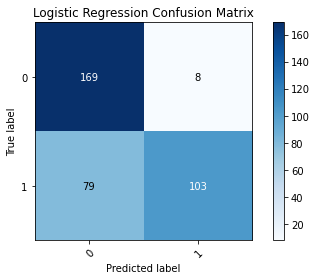

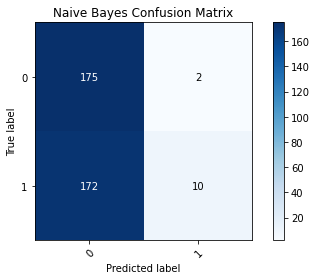

In [ ]:
import numpy as np

for name, results in tf_results.items():
    cm = results['confusion_matrix']
    classes = np.unique(y_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')
    plt.title(f'{name} Confusion Matrix')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()


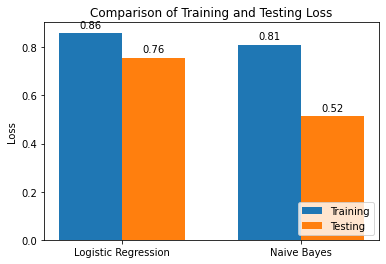

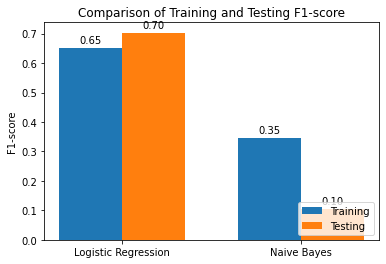

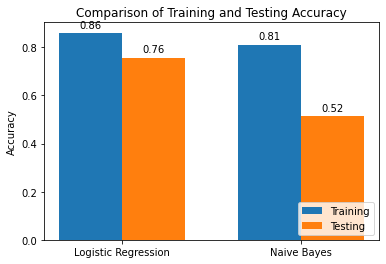

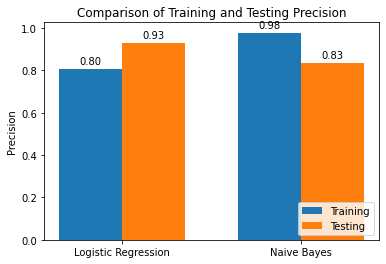

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# get data from tf_results dictionary
train_f1_LR = tf_results['Logistic Regression']['train_f1_score']
test_f1_LR = tf_results['Logistic Regression']['test_f1_score']
train_f1_NB = tf_results['Naive Bayes']['train_f1_score']
test_f1_NB = tf_results['Naive Bayes']['test_f1_score']

train_acc_LR = tf_results['Logistic Regression']['train_accuracy']
test_acc_LR = tf_results['Logistic Regression']['test_accuracy']
train_acc_NB = tf_results['Naive Bayes']['train_accuracy']
test_acc_NB = tf_results['Naive Bayes']['test_accuracy']

train_loss_LR = tf_results['Logistic Regression']['train_loss']
test_loss_LR = tf_results['Logistic Regression']['test_loss']
train_loss_NB = tf_results['Naive Bayes']['train_loss']
test_loss_NB = tf_results['Naive Bayes']['test_loss']

train_pre_LR = tf_results['Logistic Regression']['train_precision']
test_pre_LR = tf_results['Logistic Regression']['test_precision']
train_pre_NB = tf_results['Naive Bayes']['train_precision']
test_pre_NB = tf_results['Naive Bayes']['test_precision']

# create bar plots for Loss
labels = ['Logistic Regression', 'Naive Bayes']
train_losses = [train_loss_LR, train_loss_NB]
test_losses = [test_loss_LR, test_loss_NB]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_losses, width, label='Training')
rects2 = ax.bar(x + width/2, test_losses, width, label='Testing')

ax.set_ylabel('Loss')
ax.set_title('Comparison of Training and Testing Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


# create bar plots for F1-scores
labels = ['Logistic Regression', 'Naive Bayes']
train_f1 = [train_f1_LR, train_f1_NB]
test_f1 = [test_f1_LR, test_f1_NB]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_f1, width, label='Training')
rects2 = ax.bar(x + width/2, test_f1, width, label='Testing')

ax.set_ylabel('F1-score')
ax.set_title('Comparison of Training and Testing F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_acc = [train_acc_LR, train_acc_NB]
test_acc = [test_acc_LR, test_acc_NB]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_acc, width, label='Training')
rects2 = ax.bar(x + width/2, test_acc, width, label='Testing')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_pre = [train_pre_LR, train_pre_NB]
test_pre = [test_pre_LR, test_pre_NB]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_pre, width, label='Training')
rects2 = ax.bar(x + width/2, test_pre, width, label='Testing')

ax.set_ylabel('Precision')
ax.set_title('Comparison of Training and Testing Precision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

### Logistic Regression with Bag of Words vs TF*IDF

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

datasets = {
    'BW': (X_train_BW, X_test_BW, y_train_BW, y_test_BW),
    'TF': (X_train_TF, X_test_TF, y_train_TF, y_test_TF)
}

log_reg_results = {}

for dataset_name, dataset in datasets.items():
    X_train, X_test, y_train, y_test = dataset
    print(f"Dataset: {dataset_name}")
    for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)
            acc_train = accuracy_score(y_train, y_pred_train)
            acc_test = accuracy_score(y_test, y_pred_test)
            f1_train = f1_score(y_train, y_pred_train)
            f1_test = f1_score(y_test, y_pred_test)
            precision_train = precision_score(y_train, y_pred_train)
            precision_test = precision_score(y_test, y_pred_test)
            train_loss = clf.score(X_train, y_train)
            test_loss = clf.score(X_test, y_test)
            print(f"{name}")
            print(f"Training Accuracy: {acc_train}")
            print(f"Testing Accuracy: {acc_test}")
            print(f"Training F1-score: {f1_train}")
            print(f"Testing F1-score: {f1_test}")
            print(f"Training Precision: {precision_train}")
            print(f"Testing Precision: {precision_test}")
            print(f"Training Loss: {train_loss}")
            print(f"Testing Loss: {test_loss}")
            print(confusion_matrix(y_test, y_pred_test))
            print(classification_report(y_test, y_pred_test))

            log_reg_results[dataset_name] = {
                'train_accuracy': acc_train,
                'test_accuracy': acc_test,
                'train_f1_score': f1_train,
                'test_f1_score': f1_test,
                'train_precision': precision_train,
                'test_precision': precision_test,
                'train_loss': train_loss,
                'test_loss': test_loss,
                'confusion_matrix': confusion_matrix(y_test, y_pred_test),
                'classification_report': classification_report(y_test, y_pred_test)
            }

Dataset: BW
Naive Bayes
Training Accuracy: 0.8791512290489474
Testing Accuracy: 0.7437325905292479
Training F1-score: 0.7026206294485813
Testing F1-score: 0.6870748299319729
Training Precision: 0.8431712702203398
Testing Precision: 0.9017857142857143
Training Loss: 0.8791512290489474
Testing Loss: 0.7437325905292479
[[166  11]
 [ 81 101]]
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       177
           1       0.90      0.55      0.69       182

    accuracy                           0.74       359
   macro avg       0.79      0.75      0.74       359
weighted avg       0.79      0.74      0.73       359

Dataset: TF
Naive Bayes
Training Accuracy: 0.8608511551391174
Testing Accuracy: 0.7576601671309192
Training F1-score: 0.650117500359695
Testing F1-score: 0.7030716723549488
Training Precision: 0.8047493247053934
Testing Precision: 0.9279279279279279
Training Loss: 0.8608511551391174
Testing Loss: 0.7576601671309192
[[169   8]
 [ 7

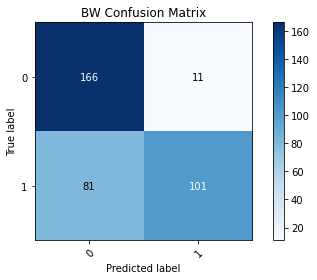

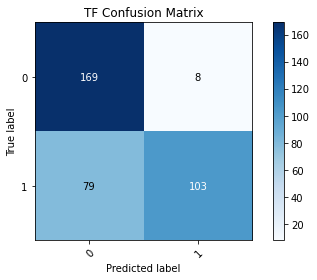

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for name, results in log_reg_results.items():
    cm = results['confusion_matrix']
    classes = np.unique(y_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')
    plt.title(f'{name} Confusion Matrix')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

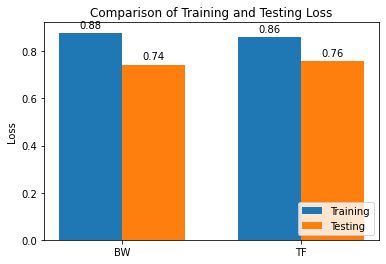

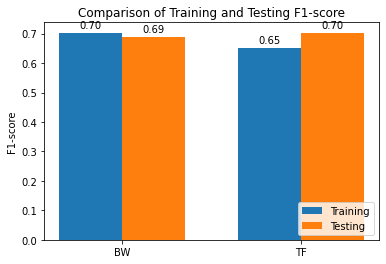

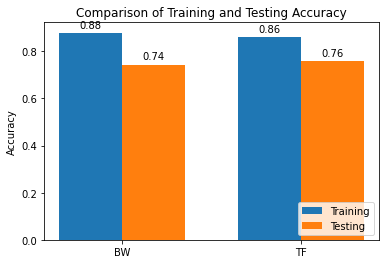

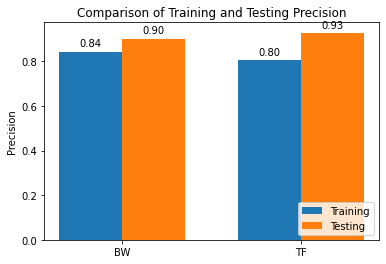

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# get data from log_reg_results dictionary
train_f1_BW = log_reg_results['BW']['train_f1_score']
test_f1_BW = log_reg_results['BW']['test_f1_score']
train_f1_TF = log_reg_results['TF']['train_f1_score']
test_f1_TF = log_reg_results['TF']['test_f1_score']

train_acc_BW = log_reg_results['BW']['train_accuracy']
test_acc_BW = log_reg_results['BW']['test_accuracy']
train_acc_TF = log_reg_results['TF']['train_accuracy']
test_acc_TF = log_reg_results['TF']['test_accuracy']

train_loss_BW = log_reg_results['BW']['train_loss']
test_loss_BW = log_reg_results['BW']['test_loss']
train_loss_TF = log_reg_results['TF']['train_loss']
test_loss_TF = log_reg_results['TF']['test_loss']

train_pre_BW = log_reg_results['BW']['train_precision']
test_pre_BW = log_reg_results['BW']['test_precision']
train_pre_TF = log_reg_results['TF']['train_precision']
test_pre_TF = log_reg_results['TF']['test_precision']

# create bar plots for Loss
labels = ['BW', 'TF']
train_losses = [train_loss_BW, train_loss_TF]
test_losses = [test_loss_BW, test_loss_TF]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_losses, width, label='Training')
rects2 = ax.bar(x + width/2, test_losses, width, label='Testing')

ax.set_ylabel('Loss')
ax.set_title('Comparison of Training and Testing Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


# create bar plots for F1-scores
labels = ['BW', 'TF']
train_f1 = [train_f1_BW, train_f1_TF]
test_f1 = [test_f1_BW, test_f1_TF]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_f1, width, label='Training')
rects2 = ax.bar(x + width/2, test_f1, width, label='Testing')

ax.set_ylabel('F1-score')
ax.set_title('Comparison of Training and Testing F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_acc = [train_acc_BW, train_acc_TF]
test_acc = [test_acc_BW, test_acc_TF]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_acc, width, label='Training')
rects2 = ax.bar(x + width/2, test_acc, width, label='Testing')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# create bar plots for Accuracy
train_pre = [train_pre_BW, train_pre_TF]
test_pre = [test_pre_BW, test_pre_TF]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_pre, width, label='Training')
rects2 = ax.bar(x + width/2, test_pre, width, label='Testing')

ax.set_ylabel('Precision')
ax.set_title('Comparison of Training and Testing Precision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# add numerical labels to bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

### Word2vec with six models

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load data
train_df = pd.read_csv('/content/coding_assignment_2/train.csv')
test_df = pd.read_csv('/content/coding_assignment_2/test.csv')

# Preprocessing
nltk.download('stopwords')
stop_words = stopwords.words('english')

def preprocess(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove stop words
    words = text.split()
    words = [w for w in words if not w in stop_words]
    # Join words back into text
    return ' '.join(words)

train_df['Text'] = train_df['Text'].apply(preprocess)
test_df['Text'] = test_df['Text'].apply(preprocess)

# Extract word2vec features
sentences_train = [text.split() for text in train_df['Text']]
sentences_test = [text.split() for text in test_df['Text']]
model = Word2Vec(sentences_train + sentences_test, min_count=1)
word_vectors = model.wv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def get_word_vectors(sentences):
    # Remove out-of-vocabulary words
    vectors = []
    for sentence in sentences:
        vector = []
        for word in sentence:
            if word in word_vectors.vocab:
                vector.append(word_vectors[word])
        vectors.append(vector)
    return vectors

def get_document_vector(word_vectors, doc):
    # Compute the average vector of words in the document
    vectors = get_word_vectors([doc])
    if len(vectors[0]) == 0:
        # If there are no vectors for any words in the document, return a zero vector
        return np.zeros((model.vector_size,))
    else:
        return np.mean(vectors[0], axis=0)

X_train = np.array([get_document_vector(word_vectors, doc) for doc in sentences_train])
y_train = train_df['Sentiment']
X_test = np.array([get_document_vector(word_vectors, doc) for doc in sentences_test])
y_test = test_df['Sentiment']

# Transform the word vectors into a sparse matrix of integer counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_df['Text'])
X_test_counts = vectorizer.transform(test_df['Text'])

# Transform the count matrix into a sparse matrix of tf-idf features
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_test_tfidf = transformer.transform(X_test_counts)

In [6]:
# Train and evaluate Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", acc_lr)

Logistic Regression accuracy: 0.7576601671309192


In [7]:
# Train and evaluate Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_counts, y_train)
y_pred_nb = nb.predict(X_test_counts)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes accuracy:", acc_nb)

Multinomial Naive Bayes accuracy: 0.6908077994428969


In [8]:
# Train and evaluate Support Vector Machine (SVM) model
svm = LinearSVC(max_iter=10000)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine accuracy:", acc_svm)

Support Vector Machine accuracy: 0.7186629526462396


In [9]:
# Train and evaluate Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train_tfidf, y_train)
y_pred_rfc = rfc.predict(X_test_tfidf)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier accuracy:", acc_rfc)

Random Forest Classifier accuracy: 0.49303621169916434


In [10]:
dtc = DecisionTreeClassifier(max_depth=None, max_features=None)
dtc.fit(X_train_tfidf, y_train)
y_pred_dtc = dtc.predict(X_test_tfidf)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier accuracy:", acc_dtc)

Decision Tree Classifier accuracy: 0.6685236768802229


In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Classifier accuracy:", acc_knn)

KNN Classifier accuracy: 0.532033426183844


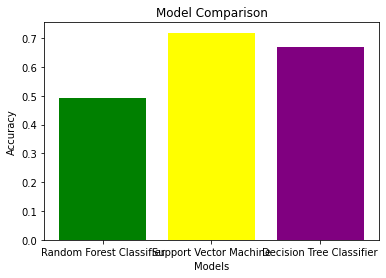

In [12]:
import matplotlib.pyplot as plt

# Set the accuracy scores for the three models
accuracies = [acc_rfc, acc_svm, acc_dtc]

# Set the labels for the bars
labels = ['Random Forest Classifier', 'Support Vector Machine', 'Decision Tree Classifier']

# Set the colors for the bars
colors = ['green', 'yellow', 'purple']

# Create the bar graph
plt.bar(labels, accuracies, color=colors)

# Set the title and axis labels
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

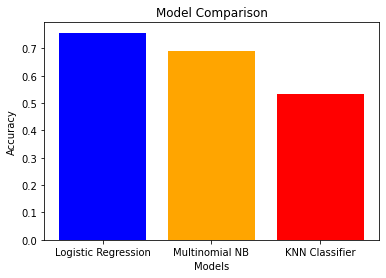

In [13]:
import matplotlib.pyplot as plt

# Set the accuracy scores for the three models
accuracies = [acc_lr, acc_nb, acc_knn]

# Set the labels for the bars
labels = ['Logistic Regression', 'Multinomial NB', 'KNN Classifier']

# Set the colors for the bars
colors = ['blue', 'orange', 'red']

# Create the bar graph
plt.bar(labels, accuracies, color=colors)

# Set the title and axis labels
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a Logistic Regression object
lr = LogisticRegression()

# Create a GridSearchCV object with the hyperparameter grid and the Logistic Regression
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Logistic Regression with the best hyperparameters and fit it to the training data
lr_best = LogisticRegression(penalty=best_params['penalty'],
                             C=best_params['C'],
                             solver=best_params['solver'])
lr_best.fit(X_train_tfidf, y_train)

# Use the new Logistic Regression to make predictions on the test data and calculate the accuracy score
y_pred_lr_best = lr_best.predict(X_test_tfidf)
acc_lr_best = accuracy_score(y_test, y_pred_lr_best)

# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_score)
print("Logistic Regression accuracy with best hyperparameters:", acc_lr_best)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
}

# Create a Multinomial Naive Bayes object
mnb = MultinomialNB()

# Create a GridSearchCV object with the hyperparameter grid and the Multinomial Naive Bayes
grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Multinomial Naive Bayes with the best hyperparameters and fit it to the training data
mnb_best = MultinomialNB(alpha=best_params['alpha'])
mnb_best.fit(X_train_tfidf, y_train)

# Use the new Multinomial Naive Bayes to make predictions on the test data and calculate the accuracy score
y_pred_mnb_best = mnb_best.predict(X_test_tfidf)
acc_mnb_best = accuracy_score(y_test, y_pred_mnb_best)

# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_score)
print("Multinomial Naive Bayes accuracy:", acc_mnb_best) 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with the hyperparameter grid and the SVM
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new SVM with the best hyperparameters and fit it to the training data
svm_best = SVC(C=best_params['C'],
               kernel=best_params['kernel'],
               gamma=best_params['gamma'])
svm_best.fit(X_train_tfidf, y_train)

# Use the new SVM to make predictions on the test data and calculate the accuracy score
y_pred_svm_best = svm_best.predict(X_test_tfidf)
acc_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_score)
print("SVM accuracy with best hyperparameters:", acc_svm_best)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier object
rfc = RandomForestClassifier()

# Create a GridSearchCV object with the hyperparameter grid and the Random Forest Classifier
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Random Forest Classifier with the best hyperparameters and fit it to the training data
rfc_best = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'])
rfc_best.fit(X_train_tfidf, y_train)

# Use the new Random Forest Classifier to make predictions on the test data and calculate the accuracy score
y_pred_rfc_best = rfc_best.predict(X_test_tfidf)
acc_rfc_best = accuracy_score(y_test, y_pred_rfc_best)

# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_score)
print("Random Forest Classifier accuracy with best hyperparameters:", acc_rfc_best)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object with the hyperparameter grid and the DecisionTreeClassifier
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new DecisionTreeClassifier with the best hyperparameters and fit it to the training data
dtc_best = DecisionTreeClassifier(criterion=best_params['criterion'],
                                  max_depth=best_params['max_depth'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'],
                                  max_features=best_params['max_features'])
dtc_best.fit(X_train_tfidf, y_train)

# Use the new DecisionTreeClassifier to make predictions on the test data and calculate the accuracy score
y_pred_dtc_best = dtc_best.predict(X_test_tfidf)
acc_dtc_best = accuracy_score(y_test, y_pred_dtc_best)

# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_score)
print("Decision Tree Classifier accuracy with best hyperparameters:", acc_dtc_best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object with the hyperparameter grid and the KNeighborsClassifier
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new KNeighborsClassifier with the best hyperparameters and fit it to the training data
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                 weights=best_params['weights'],
                                 algorithm=best_params['algorithm'],
                                 p=best_params['p'])
knn_best.fit(X_train_tfidf, y_train)

# Use the new KNeighborsClassifier to make predictions on the test data and calculate the accuracy score
y_pred_knn_best = knn_best.predict(X_test_tfidf)
acc_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", best_params)
print("Best accuracy score:", best_score)
print("KNN Classifier accuracy with best hyperparameters:", acc_knn_best)